### Objetivo
Analisar a inadimplência no território de Paraisópolis a partir do cruzamento de dados operacionais de fornecimento de água/esgoto com dados socioeconômicos do IBGE, visando identificar padrões territoriais e subsidiar estratégias diferenciadas de relacionamento e reversão da inadimplência.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_lig = pd.read_excel("RESULTADO_LIG_PARAISOPOLIS_20260105.xlsx")
df_ibge = pd.read_excel("Paraisópolis.xlsx")



In [3]:
df_lig.head()



,PDE,ID_FORNECIMENTO,NOME_SA_AC,NOME_BE_AC,CODIGO_IBG,CD_SETOR,CD_SUPERIN,DATA_LIGAC,DATA_LIG_1,DS_ENT_ORG,...,ENQUADRA_TARIFA_SOCIAL,ENDERECO_COMPLETO,LATITUDE,LONGITUDE,DATA_LIGACAO_AGUA,QTD_IRREGULARIDADES,MEDIA_CONSUMO_12_MESES,MEDIA_CONSUMO_24_MESES,VEZES_ACIMA_DOBRO_MEDIA,TEM_DEBITO
0,194075303,86040813076813,MORUMBI - OO,RIBEIRAO JAGUARE - OO,3550308,355030883000040,1136,1978-09-28,2016-08-19,SUP OESTE,...,SIM,"RUA DOUTOR FRANCISCO THOMAZ CARVALHO, 442",-23.611813,-46.725278,1978-09-28,0,20.769231,20.360000,0,1
1,194082776,194082776001,MORUMBI - OO,RIBEIRAO JAGUARE - OO,3550308,355030883000363,1136,1984-05-10,2008-11-21,SUP OESTE,...,SIM,"RUA AFONSO DE OLIVEIRA SANTOS, 300",-23.614600,-46.730358,1984-05-10,0,0.000000,0.000000,0,1
2,194082857,194082857001,MORUMBI - OO,RIBEIRAO JAGUARE - OO,3550308,355030883000363,1136,1986-10-13,2008-11-21,SUP OESTE,...,SIM,"RUA AFONSO DE OLIVEIRA SANTOS, 82",-23.614557,-46.730353,1986-10-13,0,1.166667,1.750000,3,1
3,194082938,194082938001,MORUMBI - OO,RIBEIRAO JAGUARE - OO,3550308,355030883000363,1136,1988-02-17,2008-11-21,SUP OESTE,...,SIM,"RUA AFONSO DE OLIVEIRA SANTOS, 92",-23.615223,-46.730255,1988-02-17,0,0.833333,1.333333,2,1
4,194083152,194083152001,MORUMBI - OO,RIBEIRAO JAGUARE - OO,3550308,355030883000363,1136,1982-12-29,2008-11-21,SUP OESTE,...,SIM,"RUA RUDOLF LOTZE, 1341",-23.614367,-46.729672,1982-12-29,1,NaN,NaN,0,0


In [4]:
df_ibge.head()


,id,CD_SETOR,SITUACAO,CD_SIT,CD_TIPO,AREA_KM2,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,...,Alfabetização 25 a 29,Alfabetização 30 a 34,Alfabetização 35 a 39,Alfabetização 40 a 44,Alfabetização 45 a 49,Alfabetização 50 a 54,Alfabetização 55 a 59,Alfabetização 60 a 64,Alfabetização 65 a 69,Alfabetização 70 a 80
0,90764,355030883000009,Urbana,1,1,0.016495,3,Sudeste,35,São Paulo,...,89.0,66.0,81.0,63.0,46.0,34.0,18.0,5.0,7.0,14.0
1,90894,355030883000210,Urbana,1,1,0.013716,3,Sudeste,35,São Paulo,...,105.0,120.0,106.0,123.0,54.0,74.0,32.0,16.0,9.0,28.0
2,90899,355030883000219,Urbana,1,1,0.009490,3,Sudeste,35,São Paulo,...,92.0,67.0,65.0,61.0,50.0,28.0,22.0,5.0,4.0,11.0
3,91019,355030883000346,Urbana,1,1,0.014818,3,Sudeste,35,São Paulo,...,114.0,126.0,89.0,236.0,119.0,109.0,44.0,11.0,7.0,34.0
4,91068,355030883000396,Urbana,1,1,0.005836,3,Sudeste,35,São Paulo,...,40.0,36.0,46.0,53.0,36.0,47.0,28.0,19.0,7.0,23.0


In [5]:
df_lig["CD_SETOR"] = df_lig["CD_SETOR"].astype(str)
df_ibge["CD_SETOR"] = df_ibge["CD_SETOR"].astype(str)



In [6]:
# Criar indicador de inadimplência (nível imóvel)
df_lig["TEM_DEBITO"] = np.where(
    df_lig["QTD_DEBITOS_ABERTOS"] > 0, 1, 0
)



In [7]:
# Agregação por setor censitário
df_setor = (
    df_lig
    .groupby("CD_SETOR")
    .agg(
        total_imoveis=("ID_FORNECIMENTO", "count"),
        imoveis_com_debito=("TEM_DEBITO", "sum"),
        valor_total_aberto=("VALOR_TOTAL_ABERTO", "sum")
    )
    .reset_index()
)


df_setor.head()


,CD_SETOR,total_imoveis,imoveis_com_debito,valor_total_aberto
0,355030883000009,58,47,264420.42
1,355030883000015,153,110,340869.40
2,355030883000040,173,143,729314.09
3,355030883000072,74,41,336761.80
4,355030883000076,62,25,63577.01


In [8]:
df_setor["pct_imoveis_com_debito"] = (
    df_setor["imoveis_com_debito"] / df_setor["total_imoveis"]
)



In [9]:
df_final = df_setor.merge(
    df_ibge,
    on="CD_SETOR",
    how="left"
)



In [10]:
df_final.shape
df_final.head()



,CD_SETOR,total_imoveis,imoveis_com_debito,valor_total_aberto,pct_imoveis_com_debito,id,SITUACAO,CD_SIT,CD_TIPO,AREA_KM2,...,Alfabetização 25 a 29,Alfabetização 30 a 34,Alfabetização 35 a 39,Alfabetização 40 a 44,Alfabetização 45 a 49,Alfabetização 50 a 54,Alfabetização 55 a 59,Alfabetização 60 a 64,Alfabetização 65 a 69,Alfabetização 70 a 80
0,355030883000009,58,47,264420.42,0.810345,90764.0,Urbana,1.0,1.0,0.016495,...,89.0,66.0,81.0,63.0,46.0,34.0,18.0,5.0,7.0,14.0
1,355030883000015,153,110,340869.40,0.718954,90767.0,Urbana,1.0,1.0,0.015347,...,70.0,67.0,73.0,67.0,52.0,51.0,44.0,22.0,16.0,24.0
2,355030883000040,173,143,729314.09,0.826590,90778.0,Urbana,1.0,1.0,0.023471,...,84.0,88.0,74.0,70.0,44.0,38.0,32.0,8.0,8.0,21.0
3,355030883000072,74,41,336761.80,0.554054,90791.0,Urbana,1.0,1.0,0.009117,...,62.0,51.0,48.0,47.0,46.0,38.0,21.0,3.0,5.0,14.0
4,355030883000076,62,25,63577.01,0.403226,90793.0,Urbana,1.0,1.0,0.015494,...,47.0,35.0,36.0,35.0,37.0,33.0,16.0,10.0,NaN,13.0


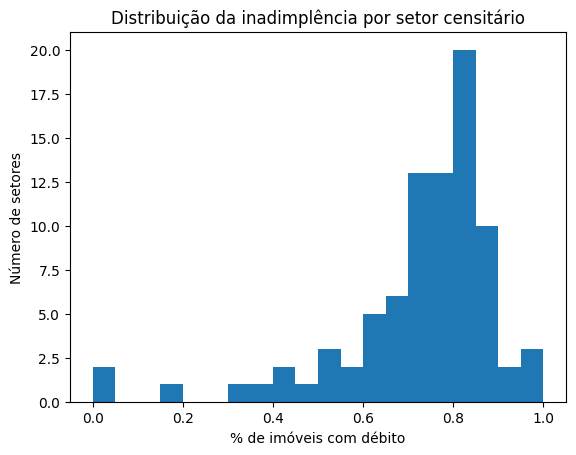

In [11]:
plt.figure()
plt.hist(df_final["pct_imoveis_com_debito"].dropna(), bins=20)
plt.xlabel("% de imóveis com débito")
plt.ylabel("Número de setores")
plt.title("Distribuição da inadimplência por setor censitário")
plt.show()



In [12]:
df_final["densidade_domiciliar"] = (
    df_final["Quantidade de pessoas"] / df_final["Total de domicílios"]
)



In [13]:
df_final["valor_medio_por_imovel_devedor"] = (
    df_final["valor_total_aberto"] / df_final["imoveis_com_debito"]
)



In [14]:
q1 = df_final["pct_imoveis_com_debito"].quantile(0.33)
q2 = df_final["pct_imoveis_com_debito"].quantile(0.66)

df_final["grupo_inadimplencia"] = pd.cut(
    df_final["pct_imoveis_com_debito"],
    bins=[0, q1, q2, 1],
    labels=["Baixa", "Média", "Alta"]
)



In [15]:
df_final["impacto_potencial"] = (
    df_final["pct_imoveis_com_debito"] * df_final["total_imoveis"]
)



In [16]:
df_final["pct_imoveis_com_debito"] = (
    df_final["imoveis_com_debito"] / df_final["total_imoveis"]
)


In [17]:
df_final["valor_medio_por_imovel_devedor"] = (
    df_final["valor_medio_por_imovel_devedor"]
    .replace([np.inf, -np.inf], np.nan)
)


In [18]:
df_final["densidade_domiciliar"] = (
    df_final["Quantidade de pessoas"] / df_final["Total de domicílios"]
)


In [19]:
df_final["impacto_potencial"] = (
    df_final["pct_imoveis_com_debito"] * df_final["total_imoveis"]
)


In [20]:
df_final[
    [
        "CD_SETOR",
        "pct_imoveis_com_debito",
        "valor_medio_por_imovel_devedor",
        "densidade_domiciliar",
        "impacto_potencial"
    ]
].head()


,CD_SETOR,pct_imoveis_com_debito,valor_medio_por_imovel_devedor,densidade_domiciliar,impacto_potencial
0,355030883000009,0.810345,5625.966383,2.685976,47.0
1,355030883000015,0.718954,3098.812727,2.600660,110.0
2,355030883000040,0.826590,5100.098531,2.432353,143.0
3,355030883000072,0.554054,8213.702439,2.833333,41.0
4,355030883000076,0.403226,2543.080400,2.569061,25.0


In [21]:
q1 = df_final["pct_imoveis_com_debito"].quantile(0.33)
q2 = df_final["pct_imoveis_com_debito"].quantile(0.66)

df_final["grupo_inadimplencia"] = pd.cut(
    df_final["pct_imoveis_com_debito"],
    bins=[0, q1, q2, 1],
    labels=["Baixa", "Média", "Alta"]
)


In [22]:
df_final["grupo_inadimplencia"].value_counts()


grupo_inadimplencia
Alta     29
Média    28
Baixa    27
Name: count, dtype: int64

C:\Users\KelliVasconcelosGalv\AppData\Local\Temp\ipykernel_11360\502655588.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_final.groupby("grupo_inadimplencia")["pct_imoveis_com_debito"].mean().plot(


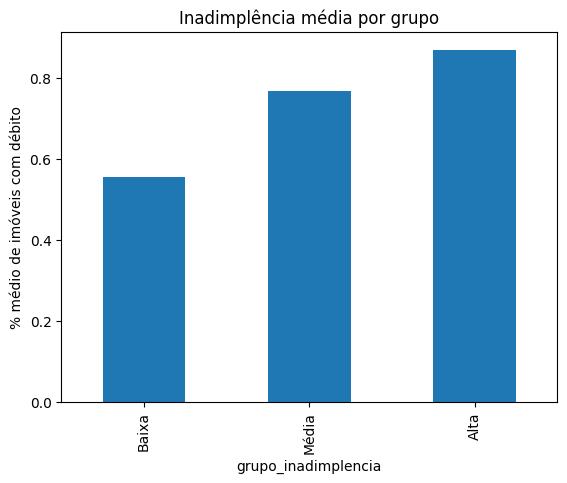

In [23]:
df_final.groupby("grupo_inadimplencia")["pct_imoveis_com_debito"].mean().plot(
    kind="bar",
    title="Inadimplência média por grupo"
)
plt.ylabel("% médio de imóveis com débito")
plt.show()


In [24]:
df_final.groupby("grupo_inadimplencia")[
    ["impacto_potencial", "total_imoveis"]
].sum()


C:\Users\KelliVasconcelosGalv\AppData\Local\Temp\ipykernel_11360\3299708126.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_final.groupby("grupo_inadimplencia")[


,impacto_potencial,total_imoveis
grupo_inadimplencia,,
Baixa,1459.0,2370
Média,3375.0,4422
Alta,4905.0,5747


In [25]:
df_final.groupby("grupo_inadimplencia")[
    ["densidade_domiciliar"]
].mean()


C:\Users\KelliVasconcelosGalv\AppData\Local\Temp\ipykernel_11360\2754002958.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_final.groupby("grupo_inadimplencia")[


,densidade_domiciliar
grupo_inadimplencia,
Baixa,2.544859
Média,2.558492
Alta,2.580736


In [26]:
ranking_setores = (
    df_final
    .sort_values("impacto_potencial", ascending=False)
    .reset_index(drop=True)
)

ranking_setores[
    [
        "CD_SETOR",
        "grupo_inadimplencia",
        "total_imoveis",
        "pct_imoveis_com_debito",
        "impacto_potencial"
    ]
].head(10)


,CD_SETOR,grupo_inadimplencia,total_imoveis,pct_imoveis_com_debito,impacto_potencial
0,355030883000357,Alta,411,0.890511,366.0
1,355030883000365,Alta,407,0.840295,342.0
2,355030883000404,Alta,399,0.857143,342.0
3,355030883000354,Alta,330,0.854545,282.0
4,355030883000364,Alta,303,0.844884,256.0
5,355030883000363,Alta,288,0.888889,256.0
6,355030883000368,Alta,284,0.855634,243.0
7,355030883000366,Média,305,0.793443,242.0
8,355030883000385,Média,315,0.723810,228.0
9,355030883000210,Alta,270,0.837037,226.0


In [27]:
ranking_criticos = (
    df_final[df_final["grupo_inadimplencia"] == "Alta"]
    .sort_values("impacto_potencial", ascending=False)
    .reset_index(drop=True)
)

ranking_criticos[
    [
        "CD_SETOR",
        "total_imoveis",
        "pct_imoveis_com_debito",
        "impacto_potencial"
    ]
].head(10)


,CD_SETOR,total_imoveis,pct_imoveis_com_debito,impacto_potencial
0,355030883000357,411,0.890511,366.0
1,355030883000365,407,0.840295,342.0
2,355030883000404,399,0.857143,342.0
3,355030883000354,330,0.854545,282.0
4,355030883000364,303,0.844884,256.0
5,355030883000363,288,0.888889,256.0
6,355030883000368,284,0.855634,243.0
7,355030883000210,270,0.837037,226.0
8,355030883000377,252,0.865079,218.0
9,355030883000369,258,0.841085,217.0


In [28]:
top_criticos = ranking_setores.head(10)


In [29]:
top_criticos[
    [
        "CD_SETOR",
        "impacto_potencial",
        "pct_imoveis_com_debito",
        "densidade_domiciliar",
        "valor_medio_por_imovel_devedor",
        "Quantidade de pessoas",
        "Total de domicílios"
    ]
]


,CD_SETOR,impacto_potencial,pct_imoveis_com_debito,densidade_domiciliar,valor_medio_por_imovel_devedor,Quantidade de pessoas,Total de domicílios
0,355030883000357,366.0,0.890511,2.803419,3966.698142,984.0,351.0
1,355030883000365,342.0,0.840295,2.515345,3563.290292,1967.0,782.0
2,355030883000404,342.0,0.857143,2.636364,2564.219942,783.0,297.0
3,355030883000354,282.0,0.854545,2.708955,5523.703794,1089.0,402.0
4,355030883000364,256.0,0.844884,2.762004,3170.746953,1323.0,479.0
5,355030883000363,256.0,0.888889,2.574176,3602.244844,937.0,364.0
6,355030883000368,243.0,0.855634,2.589862,3693.418642,1686.0,651.0
7,355030883000366,242.0,0.793443,2.684588,3861.157066,1498.0,558.0
8,355030883000385,228.0,0.723810,2.276018,4614.831974,503.0,221.0
9,355030883000210,226.0,0.837037,2.720588,4864.896062,1295.0,476.0


In [30]:
features = df_final[
    [
        "pct_imoveis_com_debito",
        "valor_medio_por_imovel_devedor",
        "densidade_domiciliar"
    ]
].dropna()


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
features["cluster"] = kmeans.fit_predict(X_scaled)


c:\Users\KelliVasconcelosGalv\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\KelliVasconcelosGalv\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\joblib\externals\loky\backend\context.py", line 255, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [33]:
df_final = df_final.merge(
    features[["cluster"]],
    left_index=True,
    right_index=True,
    how="left"
)


In [34]:
df_final.groupby("cluster")[
    [
        "pct_imoveis_com_debito",
        "valor_medio_por_imovel_devedor",
        "densidade_domiciliar",
        "impacto_potencial"
    ]
].mean()


,pct_imoveis_com_debito,valor_medio_por_imovel_devedor,densidade_domiciliar,impacto_potencial
cluster,,,,
0.0,0.779241,4414.132414,2.643290,141.210526
1.0,0.623043,3829.719942,2.305718,91.944444
2.0,0.384615,15937.612000,2.539683,5.000000


In [35]:
from sklearn.cluster import KMeans

inertia = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


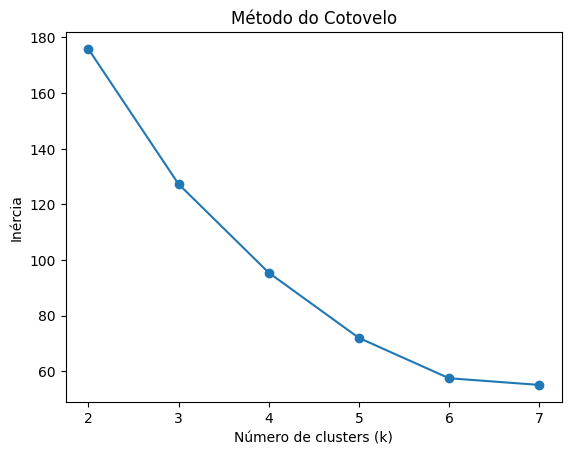

In [36]:
plt.figure()
plt.plot(k_range, inertia, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inércia")
plt.title("Método do Cotovelo")
plt.show()


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

feature_cols = [
    "pct_imoveis_com_debito",
    "valor_medio_por_imovel_devedor",
    "densidade_domiciliar",
]

# pega só as linhas que têm todas as features
df_feat = df_final[feature_cols].dropna().copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_feat)


In [38]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df_feat["cluster"] = kmeans_4.fit_predict(X_scaled)


In [39]:
df_final["cluster"] = pd.NA
df_final.loc[df_feat.index, "cluster"] = df_feat["cluster"]


In [40]:
df_final["cluster"].isna().sum()


np.int64(9)

In [41]:
df_final["cluster"].value_counts(dropna=False).sort_index()


cluster
0       51
1        4
2        1
3       20
<NA>     9
Name: count, dtype: int64

In [42]:
df_final["CD_SETOR"].nunique(), len(df_final)


(85, 85)

In [43]:
df_final.dropna(subset=["cluster"]).groupby("cluster")[
    ["pct_imoveis_com_debito", "valor_medio_por_imovel_devedor", "densidade_domiciliar", "impacto_potencial"]
].mean()


,pct_imoveis_com_debito,valor_medio_por_imovel_devedor,densidade_domiciliar,impacto_potencial
cluster,,,,
0,0.777435,4461.935928,2.667137,147.647059
1,0.298978,3129.349972,2.500983,16.000000
2,0.384615,15937.612000,2.539683,5.000000
3,0.739319,4023.218718,2.307128,105.500000


In [44]:
df_final.to_excel("df_final.xlsx", index=False)


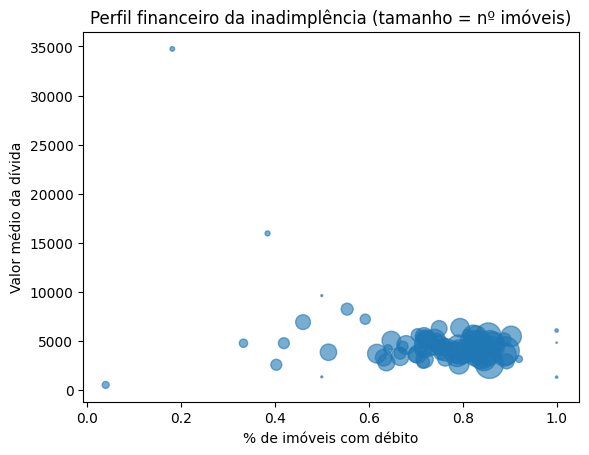

In [45]:
plt.figure()
plt.scatter(
    df_final["pct_imoveis_com_debito"],
    df_final["valor_medio_por_imovel_devedor"],
    s=df_final["total_imoveis"],
    alpha=0.6
)
plt.xlabel("% de imóveis com débito")
plt.ylabel("Valor médio da dívida")
plt.title("Perfil financeiro da inadimplência (tamanho = nº imóveis)")
plt.show()


In [46]:
coords_setor = (
    df_lig.dropna(subset=["LATITUDE", "LONGITUDE"])
    .groupby("CD_SETOR")
    .agg(
        lat_setor=("LATITUDE", "median"),
        lon_setor=("LONGITUDE", "median"),
    )
    .reset_index()
)


In [47]:
df_final = df_final.merge(coords_setor, on="CD_SETOR", how="left")


In [48]:
df_lig.columns


Index(['PDE', 'ID_FORNECIMENTO', 'NOME_SA_AC', 'NOME_BE_AC', 'CODIGO_IBG',
       'CD_SETOR', 'CD_SUPERIN', 'DATA_LIGAC', 'DATA_LIG_1', 'DS_ENT_ORG',
       'NR_ECON_IND', 'NR_ECON_RES', 'NR_ECON_PUB', 'NR_FATOR_K', 'MUNICIPIO',
       'NOME_BACIA', 'NOME_SETOR', 'RECORTE', 'SIGLA_BACI', 'SIGLA_SETO',
       'SITUACAO_FORNECIMENTO', 'SITUACAO_A', 'SITUACAO_E', 'TL', 'TRAT_ESG_D',
       'DS_TP_UTILIZACAO', 'QTD_DEBITOS_ABERTOS', 'VALOR_TOTAL_ABERTO',
       'FLAG_MIG_GEN', 'TIPO_IMOVEL', 'PERFIL_TARIFARIO',
       'ENQUADRA_TARIFA_SOCIAL', 'ENDERECO_COMPLETO', 'LATITUDE', 'LONGITUDE',
       'DATA_LIGACAO_AGUA', 'QTD_IRREGULARIDADES', 'MEDIA_CONSUMO_12_MESES',
       'MEDIA_CONSUMO_24_MESES', 'VEZES_ACIMA_DOBRO_MEDIA', 'TEM_DEBITO'],
      dtype='object')

In [49]:
coords_setor = (
    df_lig.dropna(subset=["LATITUDE", "LONGITUDE"])
    .groupby("CD_SETOR")
    .agg(
        lat_setor=("LATITUDE", "median"),
        lon_setor=("LONGITUDE", "median"),
        n_coords=("ID_FORNECIMENTO", "count")  # opcional: quantos imóveis contribuíram
    )
    .reset_index()
)

coords_setor.head()


,CD_SETOR,lat_setor,lon_setor,n_coords
0,355030883000009,-23.619309,-46.726913,58
1,355030883000015,-23.615648,-46.720221,153
2,355030883000040,-23.612600,-46.725360,173
3,355030883000072,-23.617868,-46.724104,74
4,355030883000076,-23.617848,-46.725594,62


In [50]:
df_final = df_final.merge(coords_setor, on="CD_SETOR", how="left")


In [51]:
coords_setor.head()


,CD_SETOR,lat_setor,lon_setor,n_coords
0,355030883000009,-23.619309,-46.726913,58
1,355030883000015,-23.615648,-46.720221,153
2,355030883000040,-23.612600,-46.725360,173
3,355030883000072,-23.617868,-46.724104,74
4,355030883000076,-23.617848,-46.725594,62


In [52]:
df_final = df_final.merge(coords_setor, on="CD_SETOR", how="left")


In [53]:
df_final.columns


Index(['CD_SETOR', 'total_imoveis', 'imoveis_com_debito', 'valor_total_aberto',
       'pct_imoveis_com_debito', 'id', 'SITUACAO', 'CD_SIT', 'CD_TIPO',
       'AREA_KM2', 'CD_REGIAO', 'NM_REGIAO', 'CD_UF', 'NM_UF', 'CD_MUN',
       'NM_MUN', 'CD_DIST', 'NM_DIST', 'CD_SUBDIST', 'CD_FCU', 'NM_FCU',
       'CD_RGINT', 'NM_RGINT', 'CD_RGI', 'NM_RGI', 'CD_CONCURB', 'NM_CONCURB',
       'Quantidade de pessoas', 'Total de domicílios',
       'Total de domicílios particulares', 'Total de domicílios coletivos',
       'Média de moradores em domicílios particulares ocupados',
       'Média de moradores em domicílios particulares imputados',
       'Total de domicílios particulares ocupados', 'Acesso a esgoto',
       'Acesso a água', 'Lixo coletado_moradores', 'Alfabetização 15 a 19',
       'Alfabetização 20 a 24', 'Alfabetização 25 a 29',
       'Alfabetização 30 a 34 ', 'Alfabetização 35 a 39',
       'Alfabetização 40 a 44', 'Alfabetização 45 a 49',
       'Alfabetização 50 a 54', 'Alfabetiz

In [54]:
df_final[["lat_setor", "lon_setor"]].isna().sum()


lat_setor    0
lon_setor    0
dtype: int64

In [55]:
import plotly.express as px


In [56]:
cluster_labels = {
    0: "Crítico estrutural de alto impacto",
    3: "Crítico estrutural de médio impacto",
    2: "Dívida concentrada (casos pontuais)",
    1: "Setores relativamente estáveis",
}

df_final["perfil_interpretativo"] = df_final["cluster"].map(cluster_labels)


In [57]:
df_map = df_final.dropna(subset=["lat_setor", "lon_setor", "cluster"]).copy()
df_map["cluster"] = df_map["cluster"].astype(int)


In [58]:
df_map.columns[df_map.columns.str.contains("perfil|lat_setor|lon_setor|cluster")]


Index(['cluster', 'lat_setor_x', 'lon_setor_x', 'lat_setor_y', 'lon_setor_y',
       'lat_setor', 'lon_setor', 'perfil_interpretativo'],
      dtype='object')

In [59]:
import plotly.express as px

fig = px.scatter_mapbox(
    df_map,
    lat="lat_setor",
    lon="lon_setor",
    size="impacto_potencial",
    color="perfil_interpretativo",
    hover_data=["CD_SETOR", "pct_imoveis_com_debito", "impacto_potencial"],
    zoom=13,
    height=650,
    title="Mapa de prioridade territorial (impacto potencial)"
)

fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r":0,"t":40,"l":0,"b":0}
)

fig.show()


C:\Users\KelliVasconcelosGalv\AppData\Local\Temp\ipykernel_11360\256920107.py:3: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


In [62]:
[c for c in df_final.columns if "lat_setor" in c or "lon_setor" in c]


['lat_setor_x',
 'lon_setor_x',
 'lat_setor_y',
 'lon_setor_y',
 'lat_setor',
 'lon_setor']

In [63]:
ibge_cols = [
    "densidade_domiciliar",
    "Média de moradores em domicílios particulares ocupados",
    "Acesso a água",
    "Acesso a esgoto",
    "Lixo coletado_moradores",
    "Alfabetização 25 a 29",
    "Alfabetização 30 a 34 ",
    "Alfabetização 35 a 39",
]


In [64]:
df_ibge_cluster = (
    df_final
    .dropna(subset=["cluster"])
    [["cluster"] + ibge_cols]
)


In [65]:
perfil_ibge = (
    df_ibge_cluster
    .groupby("cluster")
    .mean()
    .reset_index()
)

perfil_ibge


,cluster,densidade_domiciliar,Média de moradores em domicílios particulares ocupados,Acesso a água,Acesso a esgoto,Lixo coletado_moradores,Alfabetização 25 a 29,Alfabetização 30 a 34,Alfabetização 35 a 39
0,0,2.667137,1.107843e+16,297.686275,259.176471,630.117647,82.019608,72.490196,73.764706
1,1,2.500983,7.750000e+15,238.750000,232.250000,572.500000,51.250000,51.250000,57.500000
2,2,2.539683,2.700000e+15,297.000000,194.000000,391.000000,92.000000,67.000000,65.000000
3,3,2.307128,8.610000e+15,262.105263,233.315789,572.052632,65.157895,56.894737,63.578947


In [72]:
df_final.columns = df_final.columns.str.strip()


In [73]:
[c for c in df_final.columns if "Alfabetização 30 a 34" in c]


['Alfabetização 30 a 34']

In [74]:
cols_ibge = [
    "densidade_domiciliar",
    "Acesso a água",
    "Acesso a esgoto",
    "Lixo coletado_moradores",
    "Alfabetização 25 a 29",
    "Alfabetização 30 a 34",
    "Alfabetização 35 a 39",
]

perfil_ibge = df_final.groupby("cluster")[cols_ibge].mean().reset_index()

perfil_relativo = perfil_ibge.copy()
for col in cols_ibge:
    perfil_relativo[col] = perfil_ibge[col] / df_final[col].mean()

perfil_relativo


,cluster,densidade_domiciliar,Acesso a água,Acesso a esgoto,Lixo coletado_moradores,Alfabetização 25 a 29,Alfabetização 30 a 34,Alfabetização 35 a 39
0,0,1.041047,1.042611,1.035381,1.034427,1.075808,1.076587,1.050779
1,1,0.976193,0.836194,0.927812,0.939839,0.672219,0.761139,0.819088
2,2,0.991298,1.040207,0.775008,0.641882,1.206716,0.995050,0.925926
3,3,0.900527,0.917993,0.932070,0.939105,0.854642,0.844971,0.905683


In [75]:
df_final.columns = df_final.columns.str.strip()
df_lig.columns = df_lig.columns.str.strip()
df_ibge.columns = df_ibge.columns.str.strip()


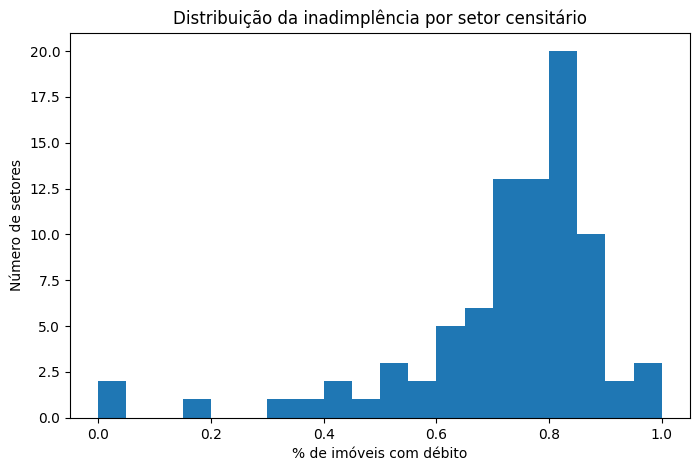

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(
    df_final["pct_imoveis_com_debito"].dropna(),
    bins=20
)

plt.xlabel("% de imóveis com débito")
plt.ylabel("Número de setores")
plt.title("Distribuição da inadimplência por setor censitário")

plt.show()
